In [2]:
import rsa
import rsa_io
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
import numpy as np


In [3]:
naive_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Naive/Still/'
naive_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Naive/Video/'
prior_still_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Prior/Still/'
prior_video_path = '/Users/huseyinelmas/Desktop/CCN-Lab/data/Prior/Video/'
eeg_rdm_dist_metric = 'correlation'
w_size = 1
window_size=25

In [16]:
def concat_wind_eeg(window_size, eeg_root_path,experiment_type, stimuli_type):
    subject_folders = [name for name in os.listdir(eeg_root_path) if
                       os.path.isdir(eeg_root_path + name) and name.startswith("subj")]
    subject_folders.sort()
    n_subjects = len(subject_folders)
    # Compare model and eeg rdms append to a list
    rdm_statistics_list = []
    #electrode_regions = ['parietal', 'occipital']
    #['central', 'frontal', 'parietal', 'temporal', 'whole_brain', 'occipital']

    electrode_region = 'parietal'
    time_window_rep_concat = defaultdict(list)
    # For all subjects do
    for i, subject_folder in enumerate(subject_folders):
        subj_name = subject_folder[0:9]
        subj_path = eeg_root_path + subject_folder + "/" + electrode_region + "/action-mats/"

        time_window_representations = rsa_io.build_eeg_data(subj_path, w_size, subj_name,
                                                            experiment_type, stimuli_type)



        for start in range(0,400,window_size):
            temp =[]
            for i in range(window_size):
                st = start + i
                end = start + i + 1
                temp.append(time_window_representations[(st,end)])
            time_window_rep_concat[(start,start+window_size)].append(np.concatenate(temp,1))
    for window, eeg_list in time_window_rep_concat.items():
        time_window_rep_concat[window] = np.asarray(eeg_list)
        print(np.asarray(eeg_list).shape)
    return time_window_rep_concat

In [17]:
time_window_rep_concat_ns=concat_wind_eeg(25,naive_still_path,"naive","still")
time_window_rep_concat_nv=concat_wind_eeg(25,naive_video_path,"naive","video")
time_window_rep_concat_ps=concat_wind_eeg(25,prior_still_path,"prior","still")
time_window_rep_concat_pv=concat_wind_eeg(25,prior_video_path,"prior","video")

(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(12, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(14, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)
(5, 24, 300)


/Users/huseyinelmas/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/huseyinelmas/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: A 2-dimensional array must be passed.

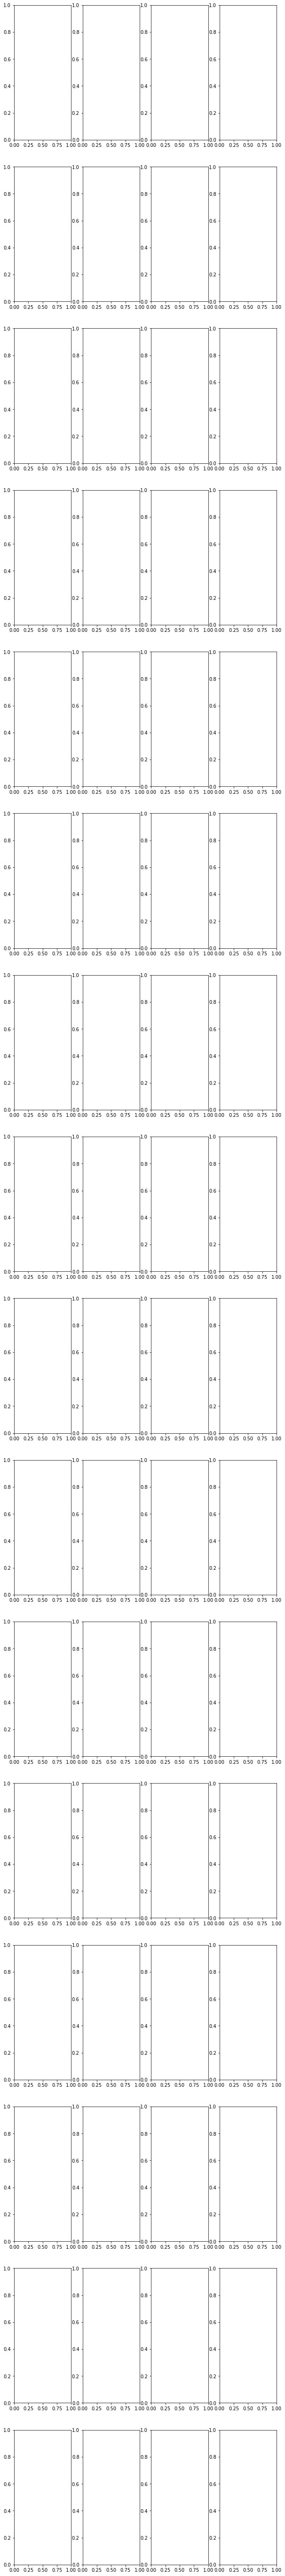

In [7]:
fig, axs = plt.subplots(len(time_window_rep_concat_ns.keys()),4,figsize=(10,100))
for i,window in enumerate(time_window_rep_concat_ns.keys()):
    rdm_ns = rsa.create_rdm(np.mean(time_window_rep_concat_ns[window],0), eeg_rdm_dist_metric,"test")
    rdm_nv = rsa.create_rdm(np.mean(time_window_rep_concat_nv[window],0), eeg_rdm_dist_metric,"test")
    rdm_ps = rsa.create_rdm(np.mean(time_window_rep_concat_ps[window],0), eeg_rdm_dist_metric,"test")
    rdm_pv = rsa.create_rdm(np.mean(time_window_rep_concat_pv[window],0), eeg_rdm_dist_metric,"test")
    im = axs[i,0].imshow(squareform(rdm_ns), interpolation='nearest')
    im = axs[i,1].imshow(squareform(rdm_nv), interpolation='nearest')
    im = axs[i,2].imshow(squareform(rdm_ns), interpolation='nearest')
    im = axs[i,3].imshow(squareform(rdm_nv), interpolation='nearest')
    axs[i,0].set_title("Naive Still RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,1].set_title("Naive Video RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,2].set_title("Prior Still RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
    axs[i,3].set_title("Prior Video RDM between in window: "+ str((2*window[0]-200,2*window[1]-200)),fontsize=10)
plt.savefig("rdm")

In [18]:
model_rdm_path = "/Users/huseyinelmas/Desktop/CCN-Lab/CCN-RSA/RSA_Results/Naive/Still/modelRDMs/"
rdm = np.load(model_rdm_path+"action_category_hamming.npy")

In [19]:

stimuli =["robot-drink","robot-grasp","robot-handwave","robot-talk","robot-nudge",
        "robot-paper","robot-turn","robot-wipe","android-drink","android-grasp","android-handwave",
        "android-talk","android-nudge","android-paper","android-turn","android-wipe","human-drink",
        "human-grasp","human-handwave","human-talk","human-nudge","human-paper","human-turn","human-wipe"]

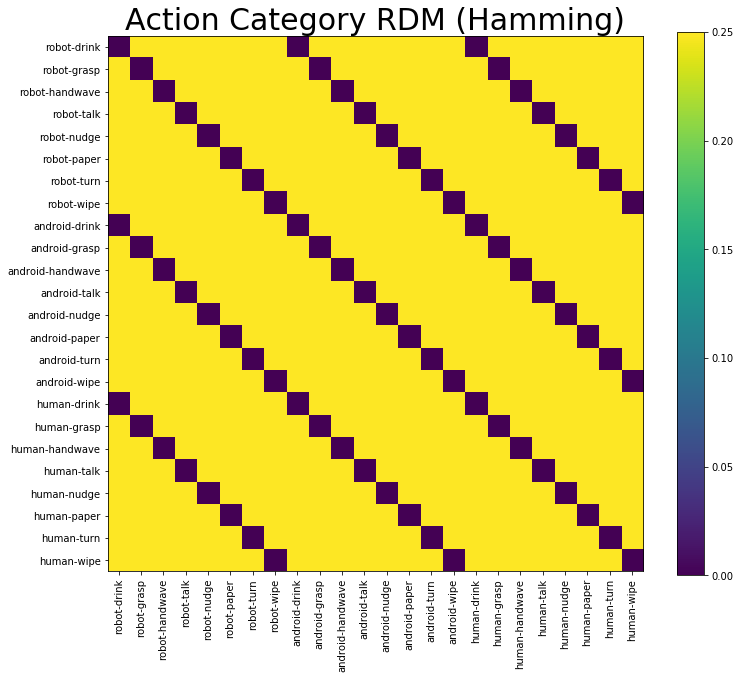

In [20]:
fig, ax = plt.subplots(figsize=(12,10))
plt.title("Action Category RDM (Hamming)",fontsize=30)
im = plt.imshow(squareform(rdm), interpolation='nearest')
ax.set_xticks(np.arange(len(stimuli)))
ax.set_yticks(np.arange(len(stimuli)))
# ... and label them with the respective list entries
ax.set_xticklabels(stimuli)
ax.set_yticklabels(stimuli)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
fig.colorbar(im)
plt.savefig("Action_hamming")

In [ ]:
time_window_representations[(0,1)]

In [ ]:
test = []
for i in range(5):
    test.append(np.random.rand(24,3))

In [ ]:
np.concatenate(test,1).shape